In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sb.set_palette("Set3")
from matplotlib import style
style.use("ggplot")

In [2]:
pwd = os.getcwd()

In [3]:
dataset = pd.read_csv(pwd + "\\housing_edit.csv")
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:

%matplotlib #displays graphs in an external window
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

UsageError: unrecognized arguments: graphs in an external window


TEST SET CREATION 

- Random instances (20%) of dataset

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#Generate a test and train set
train_set, test_set = split_train_test(dataset, 0.2)
len(train_set) 
len(test_set)

4128

The solution above doesn't work - it will iterate through the entire DS
eventually and break when fetching an updated DS.

Alternative - compute a hash of each instance's identifier and add the instance if it is <= to 20% max hash value (ensures the test set's consistency for multiple runs + not contain any instance in a previous training set)

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Dataset does not have ID column; will use the row index 

This method only works if new data is consistently appended to the 
end of the DS

In [12]:
housing_with_id = dataset.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Alternative - use a stable variable (i.e. latitude and longitude) as an 
identifier 

In [13]:
housing_with_id["id"] = dataset["longitude"] * 1000 + dataset["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Use train_test_split() [similar to split_train_test, but with random generator seed and can pass it multiple datasets with an identical num of rows, and it will split them on the same indices]

In [14]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

Create bins for median income (var of interest)

In [15]:
dataset["income_cat"] = pd.cut(dataset["median_income"], bins=[.0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

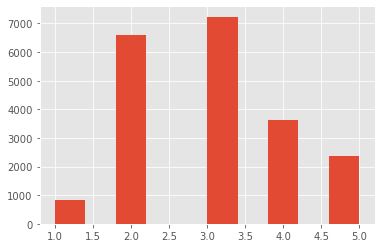

In [16]:
dataset["income_cat"].hist()

Stratify sample based on income cat.

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

NameError: name 'dataset' is not defined

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
#for data discovery 

dataset = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

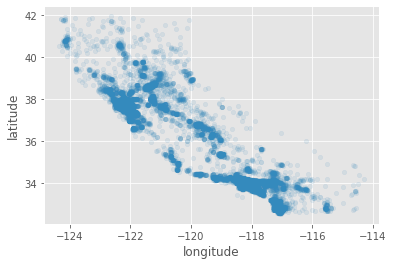

In [21]:
#checking pop. distribution

dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

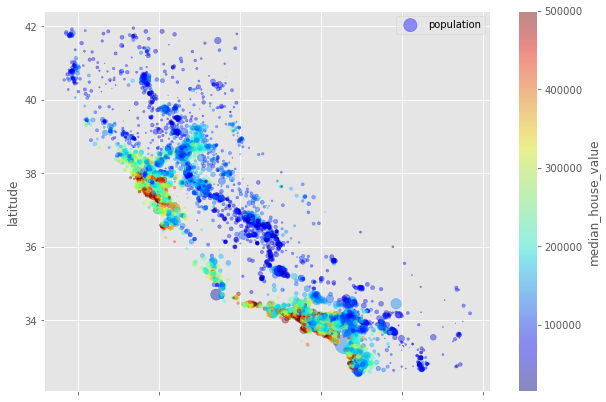

In [22]:
#checking housing price distribution

dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
    s=dataset["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Based on the heatmap above, it appears that housing prices are highly related to location(the closer the house is to the ocean, the higher the median house value) and population density (higher values in denser areas)

Calculate standard correlation coefficient (pearson's r) between every pair of attributes

In [23]:
corr_matrix = dataset.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Median income has the strongest linear correlation to median house value (close to 1)

Using scatter_matrix() for further trend analysis

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

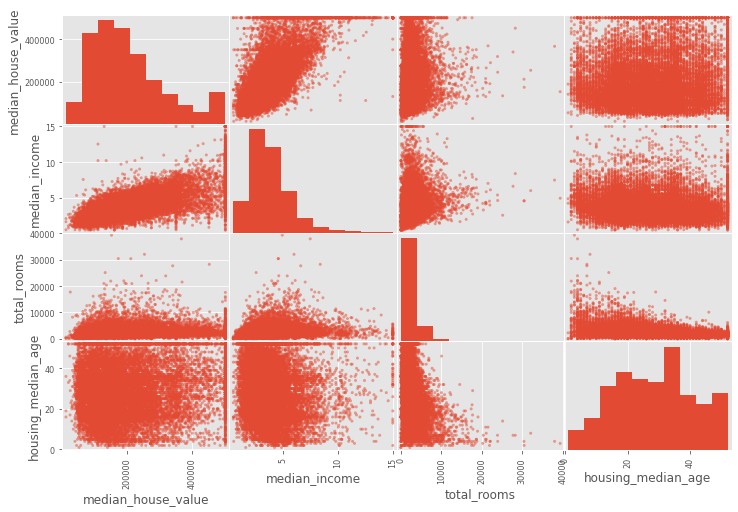

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(dataset[attributes], figsize=(12,8))

Narrow focus on median house value and median income relationship

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

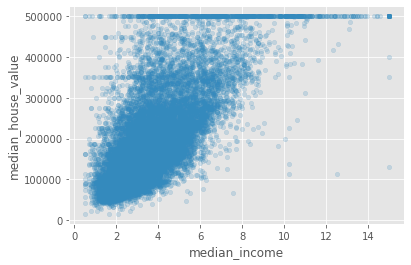

In [26]:
dataset.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

There is an upward trend in median house value and median income 
Clear price cap at $500,000
Horizontal lines at $450,000, $350,000 and $270,000 (needs cleaning)

Rooms and bedroom variable exploration

In [27]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"] 
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"]=dataset["population"]/dataset["households"]

In [28]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

bedrooms per room has a higher linear correlation with median house value than the total number of rooms or bedrooms (houses with a lower bedroom/room ratio are more expensive)
The more rooms (larger the house) the more expensive the house will be

Algorithm prep.

In [29]:
dataset = strat_train_set.drop("median_house_value", axis=1)
dataset_labels = strat_train_set["median_house_value"].copy()

In [30]:
#dropping districts with missing vals

dataset.dropna(subset=["total_bedrooms"])
dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].median(), inplace=True) #changed syntax

In [31]:
#dropping ocean_proximity vals and using imputer to calc the mean of each attribute

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = dataset.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
#all the median vals stored 
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [33]:
#imputer applied to all attributes with an int
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
#add median vals in place of missing vals
X = imputer.transform(housing_num)

In [35]:
#transform result of imputer.transform into pandas df
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index= housing_num.index)

In [36]:
dataset_cat = dataset[["ocean_proximity"]]
dataset_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


One-hot encoding for ocean_proximity variables

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
dataset_cat_1hot = cat_encoder.fit_transform(dataset_cat)
dataset_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Transformation pipline (custom) 

In [38]:
#custom transformer

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedroom_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(dataset.values)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_add', CombinedAttributesAdder()),
    ('std', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Alternative to the custom transformer (handles all columns)

In [40]:
from sklearn.compose import ColumnTransformer

nums_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, nums_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(dataset) 

Linear regression training w/ training set

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, dataset_labels)

LinearRegression()

In [42]:
some_data = dataset.iloc[:5]
some_labels = dataset_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels", list(some_labels)) 

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Measure RMSE on training set

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(dataset_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

Model underfits data; going to use another model

In [44]:
#DecisionTreeRegressor 

from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, dataset_labels)

DecisionTreeRegressor()

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(dataset_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

Need to cross-validate; evaluation above sucks
Going to use k-fold cross-validation

In [46]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, housing_prepared, dataset_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) #expects utility function; score is opposite to MSE (negative val)

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [72920.07905715 71141.50398936 69273.94952319 71924.92399962
 71143.08274747 78569.10194106 70132.73920635 73134.49256062
 68234.95701334 70751.38648592]
Mean: 71722.62165240782
Standard deviation: 2695.308686083646


In [48]:
lin_scores = cross_val_score(lin_reg, housing_prepared, dataset_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818068


Decision tree also sucks; horrible overfitting. 
Going to use RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, dataset_labels)


housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(dataset_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_mse

351971220.0788077

In [50]:
forest_scores = cross_val_score(forest_reg, housing_prepared, dataset_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.23986447 48805.16043715 46686.01310215 51937.9312836
 47771.03061701 52082.24405721 52459.80199213 49630.16380286
 48625.91000292 53955.28204031]
Mean: 50359.97771998022
Standard deviation: 2249.52935785226


Final model modifications

In [51]:
#RandomForestRegressor hyperparameter value search using GridSearch
#using consecutive powers of 10 for estimators and random small nums for max_features

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 20, 30], 'max_features': [4, 8, 12, 16]},
    {'bootstrap': [False], 'n_estimators': [10, 20], 'max_features': [10, 11, 12]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, dataset_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 8, 12, 16],
                          'n_estimators': [10, 20, 30]},
                         {'bootstrap': [False], 'max_features': [10, 11, 12],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

param_grid evalautes 3 x 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict above
then, it will try all 2 x 3 = 6 combinations of the second dic
grid search will then explore 18 (12+6) combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (we are using 5-fold cross validation)
total num of training cycles = 90 (18 x 5)

In [52]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Another method for finding the best estimator

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52714.19698005424 {'max_features': 4, 'n_estimators': 10}
50851.19335296715 {'max_features': 4, 'n_estimators': 20}
50563.5171465209 {'max_features': 4, 'n_estimators': 30}
52314.873955849325 {'max_features': 8, 'n_estimators': 10}
50637.56444785283 {'max_features': 8, 'n_estimators': 20}
49981.232490827475 {'max_features': 8, 'n_estimators': 30}
52627.97530963093 {'max_features': 12, 'n_estimators': 10}
51064.31124621143 {'max_features': 12, 'n_estimators': 20}
50609.58285420373 {'max_features': 12, 'n_estimators': 30}
53116.35643256093 {'max_features': 16, 'n_estimators': 10}
51737.18715880899 {'max_features': 16, 'n_estimators': 20}
51347.50232106081 {'max_features': 16, 'n_estimators': 30}
52157.467329582156 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
50823.9027033337 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
52435.76927434409 {'bootstrap': False, 'max_features': 11, 'n_estimators': 10}
51166.14487688662 {'bootstrap': False, 'max_features': 11, '

Best hyperparameters:

max_features = 8
n_estimators = 30
RMSE = 49903.9446480738 (lowest val)

In [54]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.77609849e-02, 6.82166708e-02, 4.38918964e-02, 1.57132259e-02,
       1.50131557e-02, 1.46365492e-02, 1.42597462e-02, 3.63094946e-01,
       5.43304070e-02, 1.09810500e-01, 5.99894156e-02, 8.77418415e-03,
       1.58660725e-01, 4.50364961e-05, 2.68735738e-03, 3.11519940e-03])

In [55]:
#checking feature importance
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = nums_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3630949455031839, 'median_income'),
 (0.15866072535991474, 'INLAND'),
 (0.1098105000953134, 'pop_per_hhold'),
 (0.06821667082573059, 'latitude'),
 (0.06776098488446491, 'longitude'),
 (0.059989415566780814, 'bedrooms_per_room'),
 (0.05433040701771818, 'rooms_per_hhold'),
 (0.0438918963774587, 'housing_median_age'),
 (0.015713225905634187, 'total_rooms'),
 (0.015013155654649783, 'total_bedrooms'),
 (0.01463654919541464, 'population'),
 (0.01425974619143313, 'households'),
 (0.008774184148345892, '<1H OCEAN'),
 (0.003115199396284377, 'NEAR OCEAN'),
 (0.0026873573815915787, 'NEAR BAY'),
 (4.503649608124137e-05, 'ISLAND')]

Test final model on test set

In [57]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48235.07942297184

In [58]:
#95% CI calc.

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), 
scale=stats.sem(squared_errors)))

array([46202.93720558, 50185.00141932])

Saving trained model

In [60]:
import joblib

joblib.dump(final_model, "final_model_random_forest_regressor.pkl")

['final_model_random_forest_regressor.pkl']